<a href="https://colab.research.google.com/github/demelere/CNNs-for-Computer-Vision/blob/master/458_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Model | Loss | Accuracy | Val Loss | Val Accuracy | Training | Testing
--- | --- | --- | --- | --- | --- | --- 
DNN (2 layers no dropout) | Row 1, Col 2 | 
DNN (3 layers no dropout) | Row 2, Col 2 |
CNN (2 layers no dropout) | Row 2, Col 2 |
CNN (2 layers no dropout) | Row 2, Col 2 |

Model | Loss | Accuracy | Val Loss | Val Accuracy | Training | Testing
--- | --- | --- | --- | --- | --- | --- 
DNN (2 layers w/dropout) | Row 1, Col 2 | 
DNN (3 layers w/dropout) | Row 2, Col 2 |
CNN (2 layers w/dropout) | Row 2, Col 2 |
CNN (2 layers w/dropout) | Row 2, Col 2 |

Parameters for all models: 
* Batch size = 100
* Epochs = 20
* Loss function = sparse categorical cross-entropy
* Optimizer = Adam

# A. Setup and Import

In [328]:
# Import dependencies
import numpy as np
import pandas as pd
import os
from collections import Counter
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
# check Keras version
keras.__version__

# check tensorflow version
tf.__version__

# set seed
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [330]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [331]:
# Saving in Colab
# os.getcwd()
# %cd /content/gdrive/My\ Drive/MSDS458/weekfive
# !pwd
# !ls
# print('Working Directory')
# print(os.getcwd())
# work_dir = "content/gdrive/My Drive/MSDS458/weekfive"
# chp_id = "ann"

## A.1 Import data

In [332]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [333]:
# training labels are integers btw/0 and 9, and correspond to different articles of clothing
Counter(train_labels).most_common()

[(9, 6000),
 (0, 6000),
 (3, 6000),
 (2, 6000),
 (7, 6000),
 (5, 6000),
 (1, 6000),
 (6, 6000),
 (4, 6000),
 (8, 6000)]

In [334]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

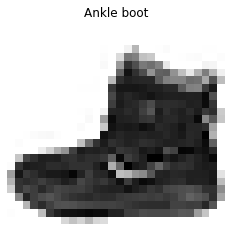

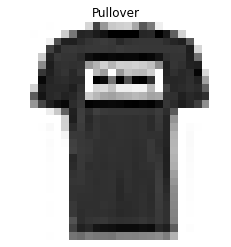

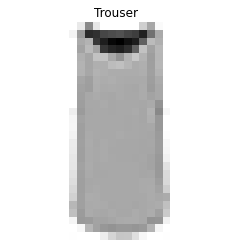

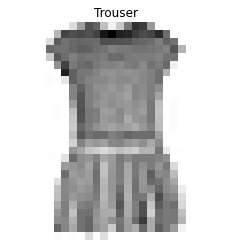

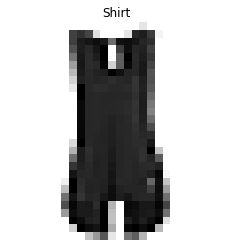

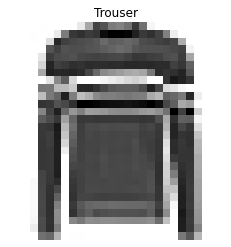

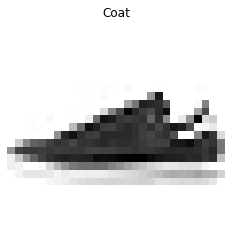

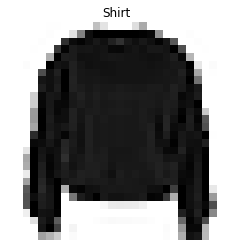

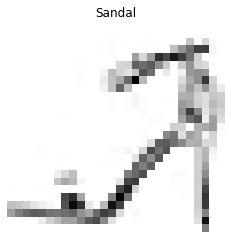

In [335]:
for i in range (9):
  plt.imshow(train_images[i], cmap="binary") 
  plt.axis('off')
  plt.title(class_names[test_labels[i]], fontsize=12)
  plt.show()

## A.2 Data Cleaning and Transformation

In [336]:
# Reshape the data into the right format for model (float32 array w/shape 60000, 28*28 and values btw/ 0 and 1).
#train_images = train_images.reshape((60000, 28 * 28))  # Decided instead to use a Flatten layer in the model
train_images = train_images.astype('float32') / 255

#test_images = test_images.reshape((10000, 28 * 28))  # Decided instead to use a Flatten layer in the model
test_images = test_images.astype('float32') / 255

In [337]:
# Hold back 5,000 of the 60,000 training images for validation.
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [338]:
# function to help calculate training and test evaluation times
class TrainRuntimeCallback(keras.callbacks.Callback):

  def on_train_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_train_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

In [339]:
class TestRuntimeCallback(keras.callbacks.Callback):

  def on_test_begin(self,logs={}):
    self.start = datetime.datetime.now()

  def on_test_end(self,logs={}):
    self.process_time = (datetime.datetime.now() - self.start).total_seconds()

# 1. Experiment 1: Baseline DNN w/2 layers

This model will have 784 input nodes.  It will take two dense (fully-connected) layers.  The first (hidden) layer will have 5 nodes, and the second (softmax) layer will have 10 output nodes.

In [340]:
model_1 = models.Sequential()
model_1.add(layers.Flatten(input_shape=[28, 28]))
model_1.add(layers.Dense(5, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax')) 

In [341]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


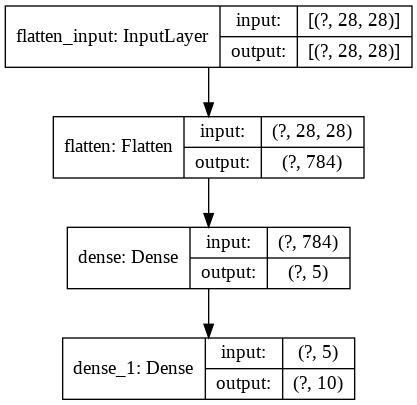

In [342]:
keras.utils.plot_model(model_1, show_shapes=True)

## 1A. Model Compilation

This step includes an optimizer (how the network updates itself based on the data and the loss function), a loss function (how the network measures how good a job it is doing on the data and adjusts), and metrics (accuracy).

In [343]:
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 1B. Model Training

Train model for 20 epochs with batch size 100

In [344]:
train_rt = TrainRuntimeCallback()
history = model_1.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.5333 - accuracy: 0.5120 - val_loss: 1.0563 - val_accuracy: 0.7034
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.8434 - accuracy: 0.7454 - val_loss: 0.6535 - val_accuracy: 0.7846
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.6183 - accuracy: 0.7958 - val_loss: 0.5835 - val_accuracy: 0.8096
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5639 - accuracy: 0.8114 - val_loss: 0.5502 - val_accuracy: 0.8138
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.8178 - val_loss: 0.5279 - val_accuracy: 0.8230
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5250 - accuracy: 0.8205 - val_loss: 0.5145 - val_accuracy: 0.8288
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5135 - accuracy: 0.8244 - val_loss: 0.5108 - val_accuracy: 0.8294
Epoch 

In [345]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

24.588407

In [346]:
model_1.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 5) dtype=float32, numpy=
 array([[-0.08495633, -0.02450575,  0.58677256, -0.18403251, -0.3040384 ],
        [-0.1338196 ,  0.01560648,  0.09165894, -0.07803695,  0.00608803],
        [ 0.39040834, -0.406651  , -0.47576344, -0.4887887 , -0.10543978],
        ...,
        [ 0.47443527,  0.41354403,  0.10598994, -0.03145842,  0.23590444],
        [ 0.00998973,  0.6004994 , -0.11730618, -0.19239648,  0.39222446],
        [ 0.07808972,  0.43139702,  0.21162088, -0.4896957 ,  0.1083212 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 1.0045778 ,  0.89614666,  0.67530775,  0.92306286, -0.32683712],
       dtype=float32)>]

## 1C. Model Testing

Test the model on the test dataset.

In [347]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.5112 - accuracy: 0.8244


In [348]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.680281

In [349]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [350]:
history_df=pd.DataFrame(history_dict)
# history_df.tail()

In [351]:
# Create a results DataFrame using the last row of history_df
results_df = history_df.iloc[-1:].copy()
results_df.insert(0,'model','DNN (2 layers)') # went the model name to appear first
results_df['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,24.588407,0.680281


In [352]:
# # Add the new data to results_df
# results_df=results_df.append(results_df2,ignore_index=True)
# results_df

## 1D. Performance

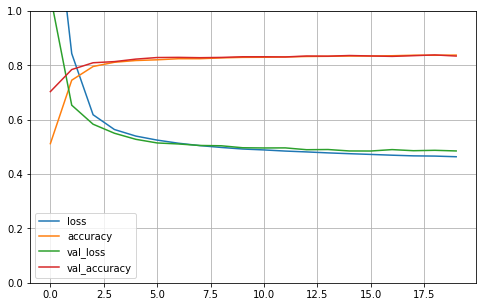

In [353]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 2. Experiment 2: DNN w/3 layers

This model will have 784 input nodes.  It will take three dense (fully-connected) layers.  The first (hidden) layer will have 10 nodes, a second hidden layer with 10 nodes, and a third (softmax) layer will have 10 output nodes.

In [354]:
# Instead of adding the layers one by one, we can pass a list of layers when creating the Sequential mode.
model_2 = models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [355]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 7,965
Trainable params: 7,965
Non-trainable params: 0
_________________________________________________________________


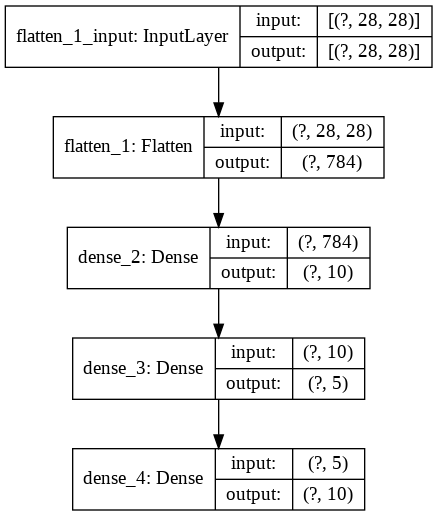

In [356]:
keras.utils.plot_model(model_2, show_shapes=True)

## 2A. Model Compilation

In [357]:
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 2B. Model Training


In [358]:
train_rt = TrainRuntimeCallback()
history = model_2.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.0934 - accuracy: 0.6273 - val_loss: 0.6276 - val_accuracy: 0.7880
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5943 - accuracy: 0.7963 - val_loss: 0.5267 - val_accuracy: 0.8194
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.8206 - val_loss: 0.5050 - val_accuracy: 0.8320
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.8315 - val_loss: 0.4757 - val_accuracy: 0.8402
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4727 - accuracy: 0.8371 - val_loss: 0.4547 - val_accuracy: 0.8458
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4590 - accuracy: 0.8415 - val_loss: 0.4435 - val_accuracy: 0.8494
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.8459 - val_loss: 0.4326 - val_accuracy: 0.8546
Epoch 

In [359]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

25.708726

In [360]:
model_2.layers[1].weights

[<tf.Variable 'dense_2/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.49256212,  0.04878264, -0.47940645, ...,  0.28546274,
         -0.38828486, -0.02152865],
        [ 0.51834637,  0.25312158,  0.5069262 , ..., -0.21221113,
         -0.65054923,  0.3423171 ],
        [ 0.18238324, -0.15022111, -0.2130859 , ...,  0.2730225 ,
         -0.69527596, -0.1994193 ],
        ...,
        [-0.23606901, -0.13785186,  0.06954492, ..., -0.06773201,
          0.23245054,  0.42269322],
        [ 0.42236984, -0.7625251 , -0.14763378, ...,  0.2259654 ,
          0.2537991 ,  0.16036204],
        [ 0.21001178, -0.1154931 , -0.16125624, ...,  0.28574926,
         -0.25067627, -0.07645912]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.337356  ,  0.40660858, -0.00816519,  0.27010483, -0.31941086,
         0.4764742 , -0.01031993, -0.1382693 , -0.25403658,  0.60228467],
       dtype=float32)>]

## 2C. Model Compilation

In [361]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.8490


In [362]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.685052

In [363]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [364]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.394387,0.863873,0.421012,0.8582
16,0.391197,0.863582,0.402562,0.8682
17,0.388530,0.865491,0.400487,0.8686
18,0.387732,0.865745,0.407128,0.8646
19,0.385630,0.865982,0.401313,0.8648


In [365]:
history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df2 = history_df.iloc[-1:].copy()
results_df2.insert(0,'model','DNN (3 layers)') # went the model name to appear first
results_df2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers),0.38563,0.865982,0.401313,0.8648,25.708726,0.685052


In [366]:
# # Add the new data to results_df
# results_df=results_df.append(results_df2,ignore_index=True)
# results_df

## 2D. Performance

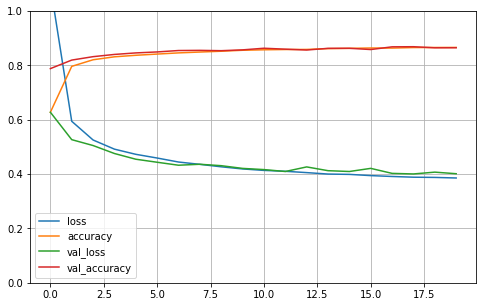

In [367]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 3. Experiment 3: CNN w/2 layers

This model will have 2 layers, each consisting of a convolution layer and a max pooling layer.  The second layer will return an array of 10 probability scores.

In [368]:
# Data re-import and preparation
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [369]:
# Reshape images and scale
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [370]:
# Validation images
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [371]:
model_3a = models.Sequential()
model_3a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3a.add(layers.MaxPooling2D((2, 2)))
model_3a.add(layers.Flatten())
model_3a.add(layers.Dense(128, activation='relu'))
model_3a.add(layers.Dense(10, activation='softmax'))

In [372]:
model_3a.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

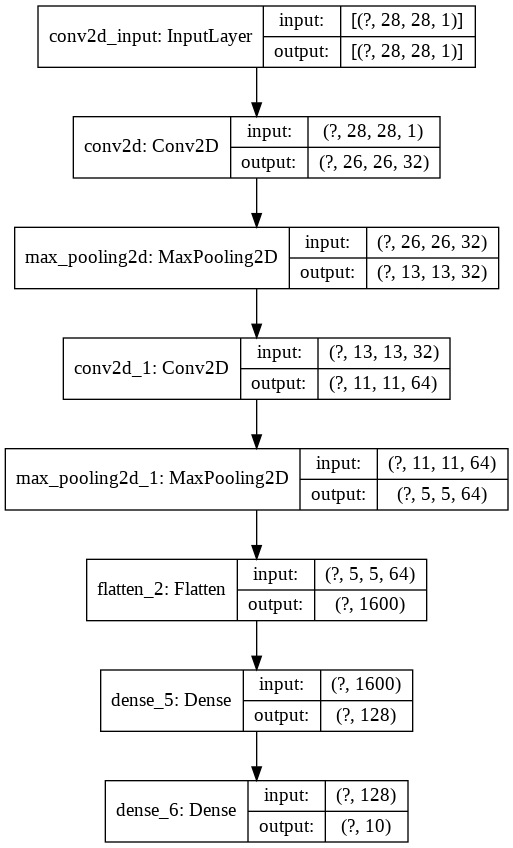

In [373]:
keras.utils.plot_model(model_3a, show_shapes=True)

## 3A. Model Compilation

In [374]:
model_3a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 3B. Model Training

In [375]:
train_rt = TrainRuntimeCallback()
history = model_3a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_3a.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.5362 - accuracy: 0.8077 - val_loss: 0.3816 - val_accuracy: 0.8626
Epoch 2/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3486 - accuracy: 0.8744 - val_loss: 0.3179 - val_accuracy: 0.8862
Epoch 3/20
550/550 [==============================] - 2s 3ms/step - loss: 0.3023 - accuracy: 0.8899 - val_loss: 0.2914 - val_accuracy: 0.8974
Epoch 4/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2679 - accuracy: 0.9023 - val_loss: 0.2734 - val_accuracy: 0.9012
Epoch 5/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2449 - accuracy: 0.9115 - val_loss: 0.2547 - val_accuracy: 0.9090
Epoch 6/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2255 - accuracy: 0.9187 - val_loss: 0.2484 - val_accuracy: 0.9100
Epoch 7/20
550/550 [==============================] - 2s 3ms/step - loss: 0.2064 - accuracy: 0.9238 - val_loss: 0.2327 - val_accuracy: 0.9178
Epoch 

In [376]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

38.238292

## 3C. Model Testing

Evaluate the model on the test dataset using a callback to get the total test time.

In [377]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3a.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.3625 - accuracy: 0.9068


In [378]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.808707

In [379]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [380]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.096507,0.964982,0.268212,0.9140
16,0.084190,0.969127,0.285734,0.9142
17,0.075458,0.972800,0.313021,0.9112
18,0.071152,0.973982,0.315250,0.9126
19,0.063891,0.976691,0.325891,0.9112


In [381]:
# Pull statistics 
results_df3a = history_df.iloc[-1:].copy()
results_df3a.insert(0,'model','CNN (2 layers)') # want the model name to appear first
results_df3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers),0.063891,0.976691,0.325891,0.9112,38.238292,0.808707


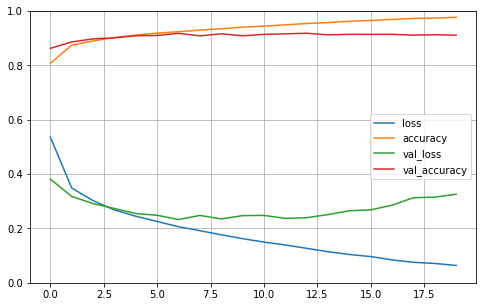

In [382]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 4. Experiment 4: CNN w/3 layers
We create a `CNN` with 3 convolution/max pooling layers (**no drop out**) to work with our Fashion MNIST dataset. The experiment compares performance using L2 regularization in the convolutional layers. Image augmentation is not employed.

## Model 4a: baseline CNN with 3 layers (no L2 regularization)

In [383]:
model_4a = models.Sequential()
model_4a.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.MaxPooling2D((2, 2)))
model_4a.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4a.add(layers.Flatten())
model_4a.add(layers.Dense(64, activation='relu'))
model_4a.add(layers.Dense(10, activation='softmax'))

In [384]:
model_4a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

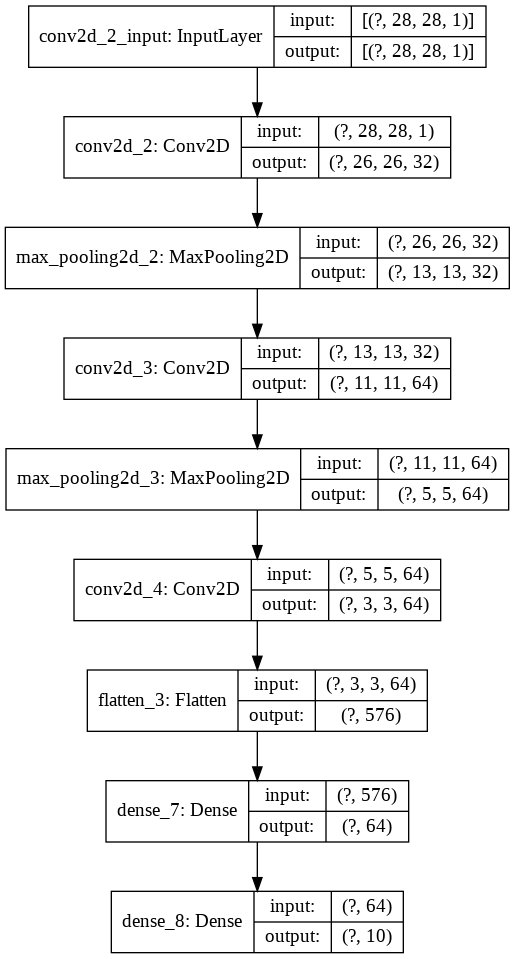

In [385]:
keras.utils.plot_model(model_4a, show_shapes=True)

## 4A. Model Compilation

In [386]:
model_4a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 4B. Model Compilation

In [387]:
train_rt = TrainRuntimeCallback()
history = model_4a.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4a.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.5858 - accuracy: 0.7859 - val_loss: 0.3799 - val_accuracy: 0.8686
Epoch 2/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3641 - accuracy: 0.8671 - val_loss: 0.3218 - val_accuracy: 0.8862
Epoch 3/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3125 - accuracy: 0.8855 - val_loss: 0.2956 - val_accuracy: 0.8942
Epoch 4/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2807 - accuracy: 0.8974 - val_loss: 0.2737 - val_accuracy: 0.8976
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2567 - accuracy: 0.9056 - val_loss: 0.2613 - val_accuracy: 0.9048
Epoch 6/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2396 - accuracy: 0.9115 - val_loss: 0.2554 - val_accuracy: 0.9066
Epoch 7/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2186 - accuracy: 0.9189 - val_loss: 0.2430 - val_accuracy: 0.9078
Epoch 

In [388]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

40.20498

## 4C. Model Testing

In [389]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4a.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.3606 - accuracy: 0.9039


In [390]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.782725

In [391]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [392]:
history_df=pd.DataFrame(history_dict)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
15,0.111249,0.958618,0.285093,0.9148
16,0.101234,0.962273,0.286589,0.9124
17,0.092144,0.966655,0.305521,0.9166
18,0.085094,0.968036,0.327381,0.9122
19,0.080035,0.969855,0.333014,0.9122


In [393]:
# Pull statistics 
# Pull statistics 
results_df4a = history_df.iloc[-1:].copy()
results_df4a.insert(0,'model','CNN (3 layers)') # want the model name to appear first
results_df4a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df4a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers),0.080035,0.969855,0.333014,0.9122,40.20498,0.782725


In [394]:
# Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = results_df.append(results_df3a,ignore_index=True)
# results_df = results_df.append(results_df3b,ignore_index=True)
# results_df

## Plot the performance 

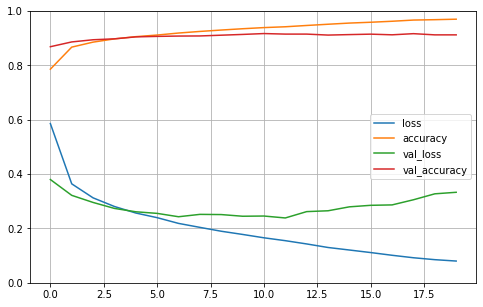

In [395]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 5. Experiment 5: Add Dropout to All Models

In [396]:
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [397]:
# We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1. 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))  
test_images = test_images.astype('float32') / 255

# Create validation data
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

## 5A. Model 1

In [398]:
model_1do = models.Sequential()
# model_1do.add(layers.Flatten(input_shape=[28, 28]))
model_1do.add(layers.Dense(5, activation='relu', input_shape=(28 * 28,)))
model_1do.add(layers.Dropout(0.2))
model_1do.add(layers.Dense(10, activation='softmax')) 

model_1do.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1do.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [399]:
train_rt = TrainRuntimeCallback()
history = model_1do.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size=100, validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_1do.h5'
# model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 3ms/step - loss: 1.6506 - accuracy: 0.3319 - val_loss: 1.1982 - val_accuracy: 0.5508
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 1.3330 - accuracy: 0.4669 - val_loss: 1.0561 - val_accuracy: 0.6696
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 1.2429 - accuracy: 0.5411 - val_loss: 0.9501 - val_accuracy: 0.7122
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1759 - accuracy: 0.5755 - val_loss: 0.8936 - val_accuracy: 0.7402
Epoch 5/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1408 - accuracy: 0.5881 - val_loss: 0.8303 - val_accuracy: 0.7602
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1036 - accuracy: 0.6036 - val_loss: 0.7908 - val_accuracy: 0.7644
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 1.0779 - accuracy: 0.6135 - val_loss: 0.7691 - val_accuracy: 0.7716
Epoch 

In [400]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

25.276361

In [401]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_1do.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.7349 - accuracy: 0.7840


In [402]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.686898

In [403]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Create a results DataFrame using the last row of history_df
results_df_do = history_df.iloc[-1:].copy()
results_df_do.insert(0,'model','DNN (2 layers DO)') # went the model name to appear first
results_df_do['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers DO),1.013321,0.651164,0.708738,0.7948,25.276361,0.686898


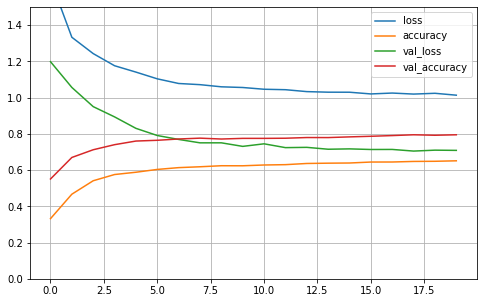

In [404]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

## 5B. Model 2

In [405]:
model_2do = models.Sequential()
# model_1do.add(layers.Flatten(input_shape=[28, 28]))
model_2do.add(layers.Dense(5, activation='relu', input_shape=(28 * 28,)))
model_2do.add(layers.Dropout(0.2))
model_2do.add(layers.Dense(10, activation='relu'))
model_2do.add(layers.Dropout(0.2))
model_2do.add(layers.Dense(10, activation='softmax')) 

model_2do.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2do.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 4,095
Trainable params: 4,095
Non-trainable params: 0
_________________________________________________________________


In [406]:
train_rt = TrainRuntimeCallback()
history = model_2do.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_2do.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 1s 2ms/step - loss: 1.6709 - accuracy: 0.3477 - val_loss: 1.0549 - val_accuracy: 0.6470
Epoch 2/20
550/550 [==============================] - 1s 2ms/step - loss: 1.2990 - accuracy: 0.4777 - val_loss: 0.8325 - val_accuracy: 0.7202
Epoch 3/20
550/550 [==============================] - 1s 2ms/step - loss: 1.2083 - accuracy: 0.5180 - val_loss: 0.7699 - val_accuracy: 0.7286
Epoch 4/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1654 - accuracy: 0.5297 - val_loss: 0.7732 - val_accuracy: 0.7388
Epoch 5/20
550/550 [==============================] - 1s 3ms/step - loss: 1.1406 - accuracy: 0.5389 - val_loss: 0.7421 - val_accuracy: 0.7330
Epoch 6/20
550/550 [==============================] - 1s 2ms/step - loss: 1.1148 - accuracy: 0.5505 - val_loss: 0.7316 - val_accuracy: 0.7510
Epoch 7/20
550/550 [==============================] - 1s 2ms/step - loss: 1.0889 - accuracy: 0.5667 - val_loss: 0.7412 - val_accuracy: 0.7524
Epoch 

In [407]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

28.653613

In [408]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_2do.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.7103 - accuracy: 0.7564


In [409]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.705578

In [410]:
history_dict = history.history
history_dict.keys()

istory_df=pd.DataFrame(history_dict)
history_df.tail()

history_dict = history.history
history_df=pd.DataFrame(history_dict)
results_df_do_2 = history_df.iloc[-1:].copy()
results_df_do_2.insert(0,'model','DNN (3 layers DO)') # went the model name to appear first
results_df_do_2['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_2['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_2

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (3 layers DO),0.988412,0.630727,0.703835,0.7608,28.653613,0.705578


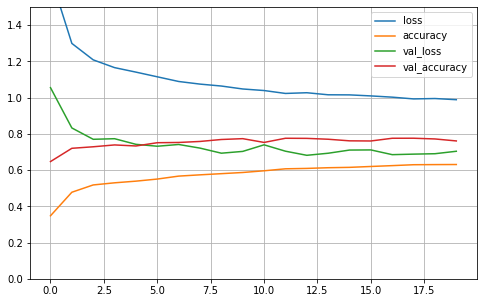

In [411]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()

## 5C. Model 3

In [412]:
# We transform it into a float32 array of shape (60000, 28, 28, 1) with values between 0 and 1. 
train_images = train_images.reshape((55000, 28, 28, 1))
val_images =val_images.reshape((5000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [413]:
model_3ado = models.Sequential()
model_3ado.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3ado.add(layers.MaxPooling2D((2, 2)))
model_3ado.add(layers.Dropout(0.2))
model_3ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3ado.add(layers.MaxPooling2D((2, 2)))
model_3ado.add(layers.Dropout(0.2))
model_3ado.add(layers.Flatten())
model_3ado.add(layers.Dense(128, activation='relu'))
model_3ado.add(layers.Dense(10, activation='softmax'))

model_3ado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3ado.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

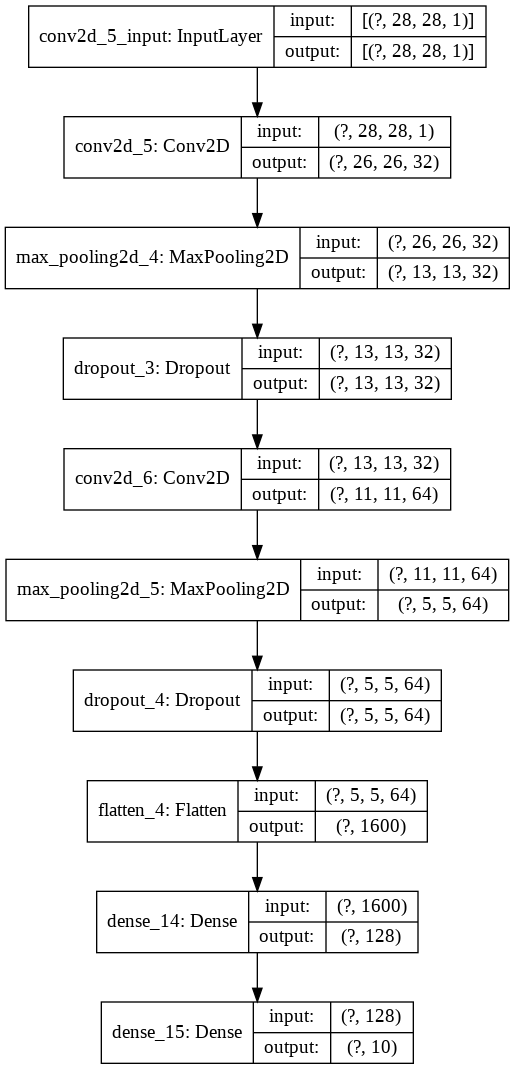

In [414]:
keras.utils.plot_model(model_3ado, show_shapes=True)

In [415]:
train_rt = TrainRuntimeCallback()
history = model_3ado.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_3ado.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.6061 - accuracy: 0.7773 - val_loss: 0.4099 - val_accuracy: 0.8564
Epoch 2/20
550/550 [==============================] - 2s 4ms/step - loss: 0.4045 - accuracy: 0.8527 - val_loss: 0.3423 - val_accuracy: 0.8802
Epoch 3/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3496 - accuracy: 0.8710 - val_loss: 0.3087 - val_accuracy: 0.8924
Epoch 4/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8842 - val_loss: 0.2798 - val_accuracy: 0.8982
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2912 - accuracy: 0.8930 - val_loss: 0.2631 - val_accuracy: 0.9036
Epoch 6/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2738 - accuracy: 0.8995 - val_loss: 0.2536 - val_accuracy: 0.9062
Epoch 7/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2549 - accuracy: 0.9056 - val_loss: 0.2467 - val_accuracy: 0.9080
Epoch 

In [416]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

40.292825

In [417]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_3ado.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.2362 - accuracy: 0.9152


In [418]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.854104

In [419]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Pull statistics 
results_df_do_3a = history_df.iloc[-1:].copy()
results_df_do_3a.insert(0,'model','CNN (2 layers DO)') # want the model name to appear first
results_df_do_3a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_3a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_3a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (2 layers DO),0.152211,0.941564,0.214356,0.924,40.292825,0.854104


In [420]:
# # Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = prev_results_df.append(results_df,ignore_index=True)
# results_df

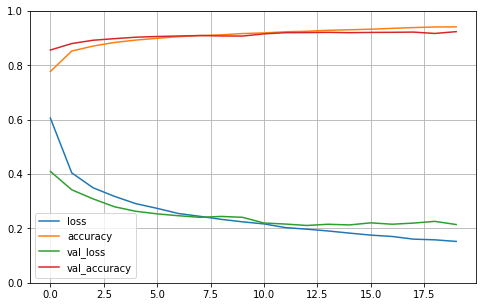

In [421]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## 5D. Model 4

In [422]:
model_4ado = models.Sequential()
model_4ado.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4ado.add(layers.MaxPooling2D((2, 2)))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4ado.add(layers.MaxPooling2D((2, 2)))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4ado.add(layers.Dropout(0.2))
model_4ado.add(layers.Flatten())
model_4ado.add(layers.Dense(64, activation='relu'))
model_4ado.add(layers.Dense(10, activation='softmax'))

model_4ado.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4ado.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)         

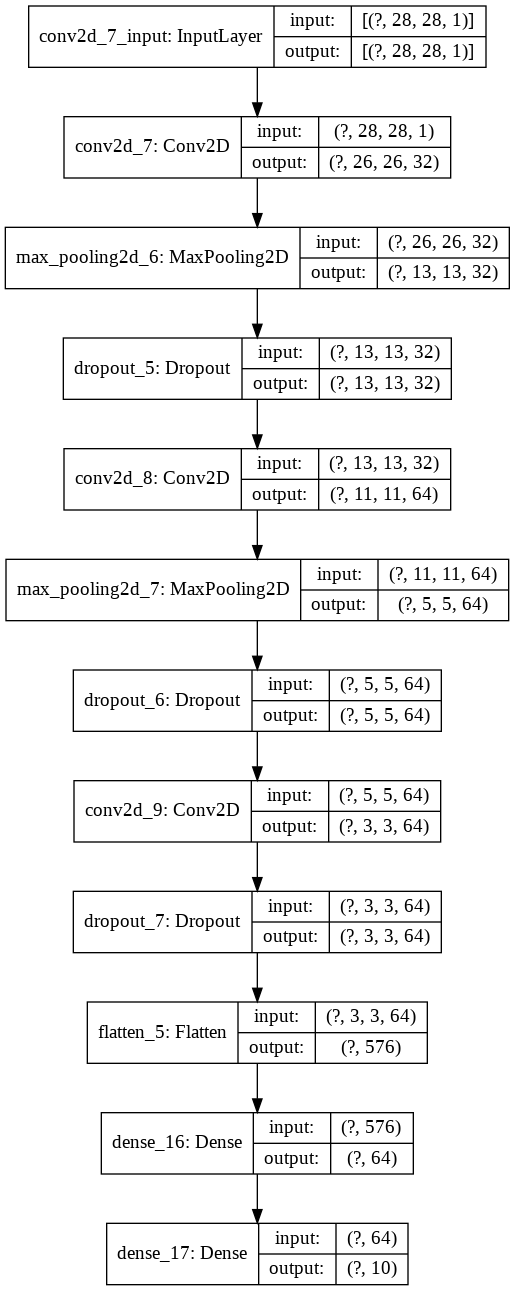

In [423]:
keras.utils.plot_model(model_4ado, show_shapes=True)

In [424]:
train_rt = TrainRuntimeCallback()
history = model_4ado.fit(train_images, train_labels, callbacks=[train_rt], epochs=20, batch_size = 100,
                    validation_data=(val_images, val_labels))

# Saving models locally after fitting
save_dir = "results/"
model_name = 'fashion_mnist_model_4ado.h5'
model_path = os.path.join(save_dir, model_name)
print('--------------------------')

Epoch 1/20
550/550 [==============================] - 2s 4ms/step - loss: 0.6642 - accuracy: 0.7515 - val_loss: 0.3986 - val_accuracy: 0.8620
Epoch 2/20
550/550 [==============================] - 2s 4ms/step - loss: 0.4181 - accuracy: 0.8470 - val_loss: 0.3314 - val_accuracy: 0.8838
Epoch 3/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3656 - accuracy: 0.8645 - val_loss: 0.3078 - val_accuracy: 0.8848
Epoch 4/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3303 - accuracy: 0.8789 - val_loss: 0.2770 - val_accuracy: 0.8982
Epoch 5/20
550/550 [==============================] - 2s 4ms/step - loss: 0.3079 - accuracy: 0.8858 - val_loss: 0.2697 - val_accuracy: 0.9014
Epoch 6/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2932 - accuracy: 0.8914 - val_loss: 0.2613 - val_accuracy: 0.9052
Epoch 7/20
550/550 [==============================] - 2s 4ms/step - loss: 0.2800 - accuracy: 0.8964 - val_loss: 0.2510 - val_accuracy: 0.9082
Epoch 

In [425]:
# Get the training time
train_time = train_rt.process_time
train_time # in seconds

43.237015

In [426]:
test_rt = TestRuntimeCallback()
test_loss, test_acc = model_4ado.evaluate(test_images, test_labels, callbacks=[test_rt])

313/313 [==============================] - 1s 2ms/step - loss: 0.2389 - accuracy: 0.9119


In [427]:
# Get the test time
test_time = test_rt.process_time
test_time # in seconds

0.794071

In [428]:
history_dict = history.history
history_dict.keys()

history_df=pd.DataFrame(history_dict)
history_df.tail()

# Pull statistics 
# Pull statistics 
results_df_do_4a = history_df.iloc[-1:].copy()
results_df_do_4a.insert(0,'model','CNN (3 layers DO)') # want the model name to appear first
results_df_do_4a['training time (sec)'] = train_time      # we are okay with training time appearing last
results_df_do_4a['testing time (sec)'] = test_time      # we are okay with training time appearing last
results_df_do_4a

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,CNN (3 layers DO),0.202688,0.923545,0.216248,0.9206,43.237015,0.794071


In [429]:
# Combine with previous results
# prev_results_df = pd.read_pickle('results.pkl')
# results_df = results_df.append(results_df3a,ignore_index=True)
# results_df = results_df.append(results_df3b,ignore_index=True)
# results_df

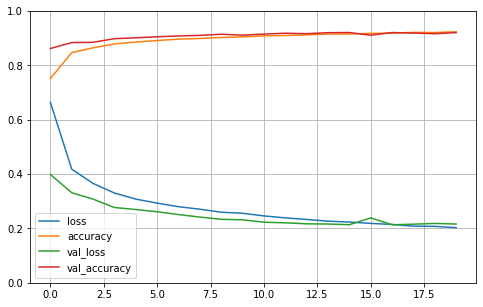

In [430]:
# Plot learning curves for model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# 6. Final Results

In [431]:
results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
19,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,24.588407,0.680281


In [433]:
# # Add the new data to results_df:

results_df=results_df.append(results_df2,ignore_index=True)
results_df=results_df.append(results_df3a,ignore_index=True)
results_df=results_df.append(results_df4a,ignore_index=True)
results_df=results_df.append(results_df_do,ignore_index=True)
results_df=results_df.append(results_df_do_2,ignore_index=True)
results_df=results_df.append(results_df_do_3a,ignore_index=True)
results_df=results_df.append(results_df_do_4a,ignore_index=True)

results_df

,model,loss,accuracy,val_loss,val_accuracy,training time (sec),testing time (sec)
0,DNN (2 layers),0.463785,0.837818,0.485111,0.8342,24.588407,0.680281
1,DNN (3 layers),0.385630,0.865982,0.401313,0.8648,25.708726,0.685052
2,CNN (2 layers),0.063891,0.976691,0.325891,0.9112,38.238292,0.808707
3,CNN (3 layers),0.080035,0.969855,0.333014,0.9122,40.204980,0.782725
4,DNN (2 layers DO),1.013321,0.651164,0.708738,0.7948,25.276361,0.686898
5,DNN (3 layers DO),0.988412,0.630727,0.703835,0.7608,28.653613,0.705578
6,CNN (2 layers DO),0.152211,0.941564,0.214356,0.9240,40.292825,0.854104
7,CNN (3 layers DO),0.202688,0.923545,0.216248,0.9206,43.237015,0.794071
